<a href="https://colab.research.google.com/github/tsantosh7/Unsupervised-Supervised-Protein-Genes-Diseases-Organisms-Extraction/blob/master/Notebooks/metagenomics_annotations/metagenomic_data_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import glob

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!pwd

/content


In [4]:
# !pip install accelerate -U
# !pip install transformers[torch]

In [5]:
folder_path = '/content/gdrive/MyDrive/Colab Notebooks/Metagenomics/input'  # Replace with the actual path to your folder

# Use glob to find all files named "devel.csv" within the folder
file_paths = glob.glob(folder_path + '/**/train_dev.tsv', recursive=True)

# Print the paths of the found files
for file_path in file_paths:
    print(file_path)





/content/gdrive/MyDrive/Colab Notebooks/Metagenomics/input/LS/train_dev.tsv
/content/gdrive/MyDrive/Colab Notebooks/Metagenomics/input/ecoregion/train_dev.tsv
/content/gdrive/MyDrive/Colab Notebooks/Metagenomics/input/sequencing/train_dev.tsv
/content/gdrive/MyDrive/Colab Notebooks/Metagenomics/input/kit/train_dev.tsv
/content/gdrive/MyDrive/Colab Notebooks/Metagenomics/input/sample-material/train_dev.tsv
/content/gdrive/MyDrive/Colab Notebooks/Metagenomics/input/LCM/train_dev.tsv
/content/gdrive/MyDrive/Colab Notebooks/Metagenomics/input/engineered/train_dev.tsv
/content/gdrive/MyDrive/Colab Notebooks/Metagenomics/input/host/train_dev.tsv
/content/gdrive/MyDrive/Colab Notebooks/Metagenomics/input/date/train_dev.tsv
/content/gdrive/MyDrive/Colab Notebooks/Metagenomics/input/body-site/train_dev.tsv
/content/gdrive/MyDrive/Colab Notebooks/Metagenomics/input/place/train_dev.tsv
/content/gdrive/MyDrive/Colab Notebooks/Metagenomics/input/site/train_dev.tsv
/content/gdrive/MyDrive/Colab Note

In [6]:
file_path

'/content/gdrive/MyDrive/Colab Notebooks/Metagenomics/input/treatment/train_dev.tsv'

In [7]:
data_frame = pd.DataFrame()  # Initialize an empty DataFrame

# Use glob to find all files named "devel.csv" within the folder
file_paths = glob.glob(folder_path + '/**/train_dev.tsv', recursive=True)

# Iterate over the file paths and load each CSV file
for file_path in file_paths:
    # Load the CSV file into a temporary DataFrame
    temp_df = pd.read_csv(file_path, sep = '\t', names=['token','entity'], skip_blank_lines=False, na_filter = False)
    column_name = file_path.split('/')[-2]
    # Extract the desired column from the temporary DataFrame
    column_data = temp_df['entity']

    # Append the column to the main DataFrame
    data_frame[column_name] = column_data

# Print the resulting DataFrame
print(data_frame)

      LS ecoregion sequencing kit sample-material LCM engineered host date  \
0      O         O          O   O               O   O          O    O    O   
1      O         O          O   O               B   O          O    O    O   
2      O         O          O   O               I   O          O    O    O   
3      O         O          O   O               I   O          O    O    O   
4      O         O          O   O               O   O          O    O    O   
...   ..       ...        ...  ..             ...  ..        ...  ...  ...   
90823  O         O          O   O               O   O          O    O    O   
90824  O         O          O   O               O   O          O    O    O   
90825  O         O          O   O               O   O          O    O    O   
90826  O         O          O   O               O   O          O    O    O   
90827                                                                        

      body-site place site gene state primer treatment  
0     

In [8]:
tokens_column = temp_df["token"]
data_frame.insert(0, "token", tokens_column)

In [9]:
data_frame

,token,LS,ecoregion,sequencing,kit,sample-material,LCM,engineered,host,date,body-site,place,site,gene,state,primer,treatment
0,Methods,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
1,Sediment,O,O,O,O,B,O,O,O,O,O,O,B,O,O,O,O
2,core,O,O,O,O,I,O,O,O,O,O,O,I,O,O,O,O
3,sample,O,O,O,O,I,O,O,O,O,O,O,O,O,O,O,O
4,In,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90823,",",O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
90824,CA,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
90825,),O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
90826,.,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O


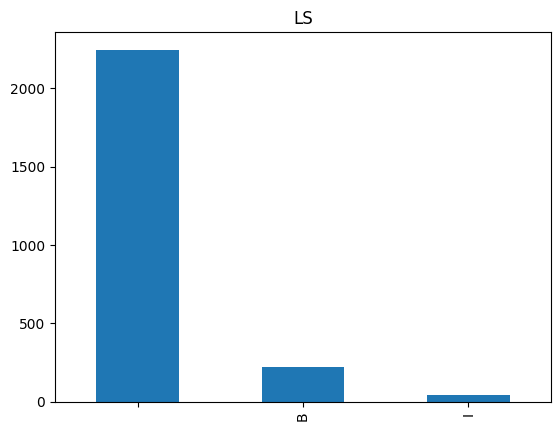

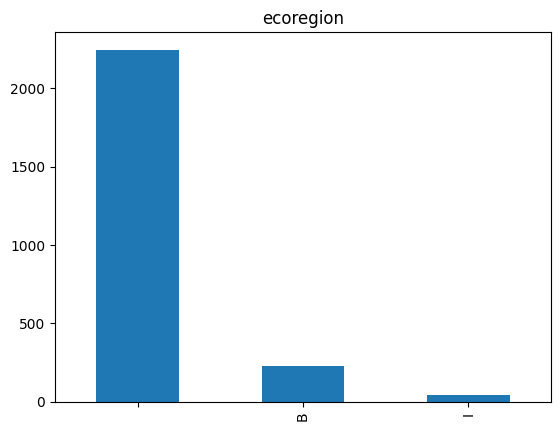

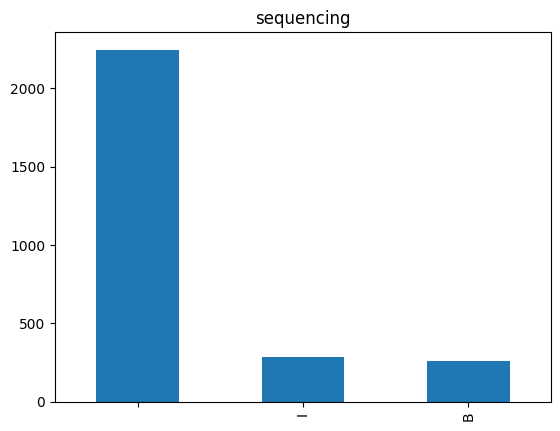

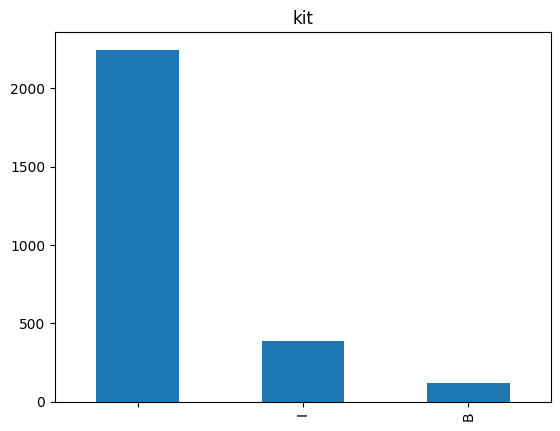

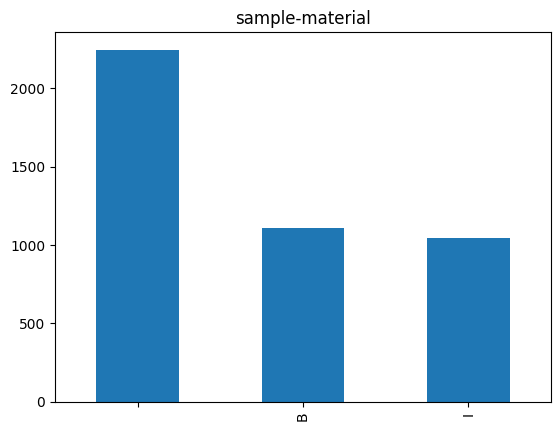

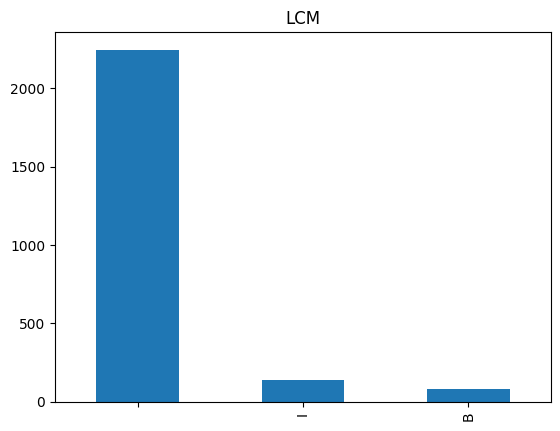

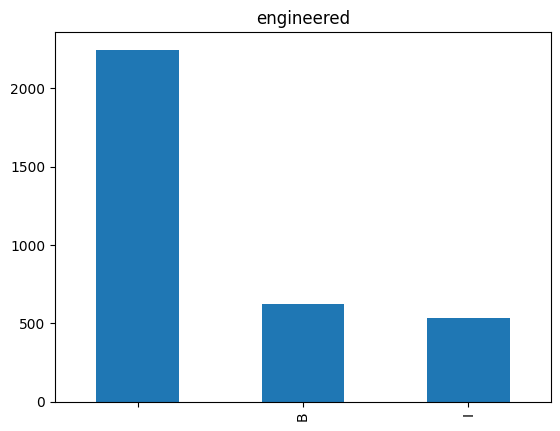

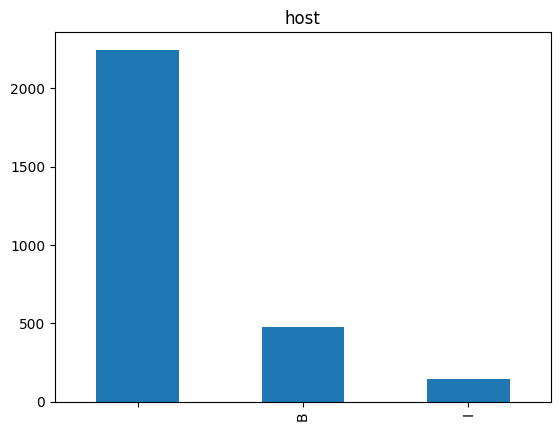

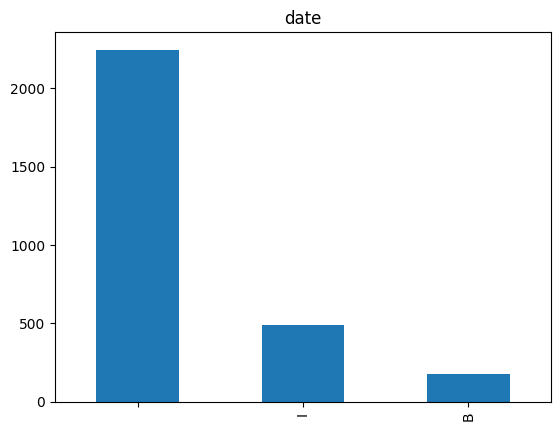

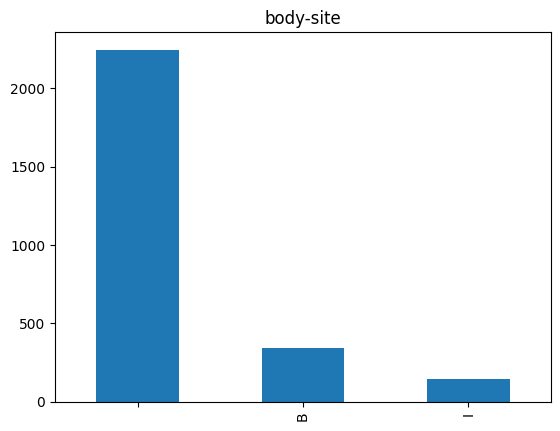

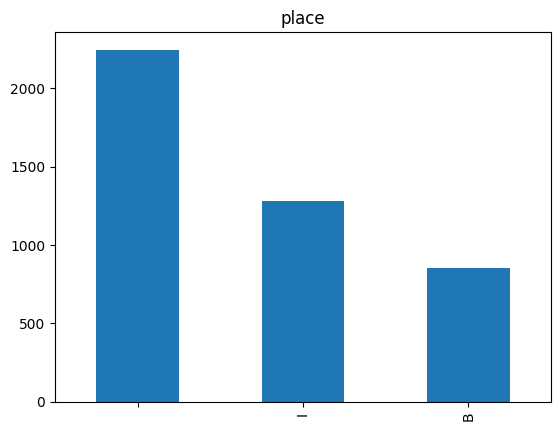

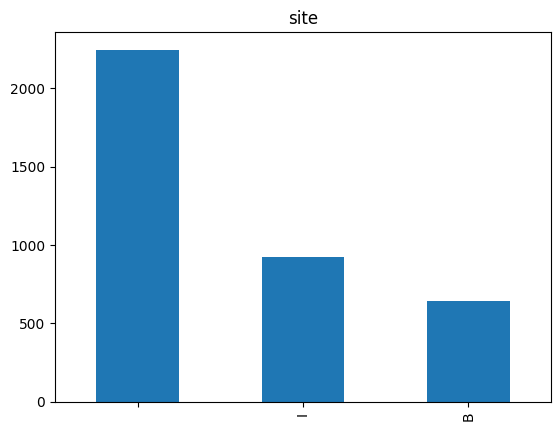

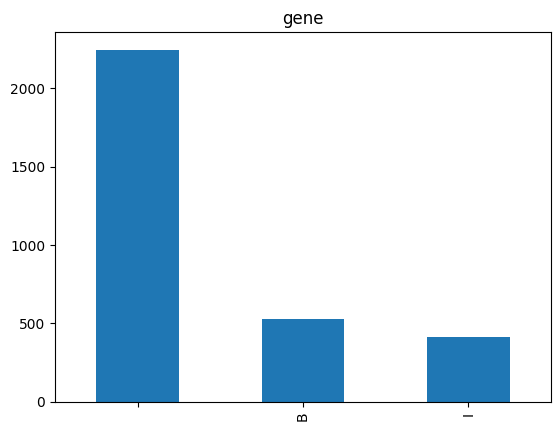

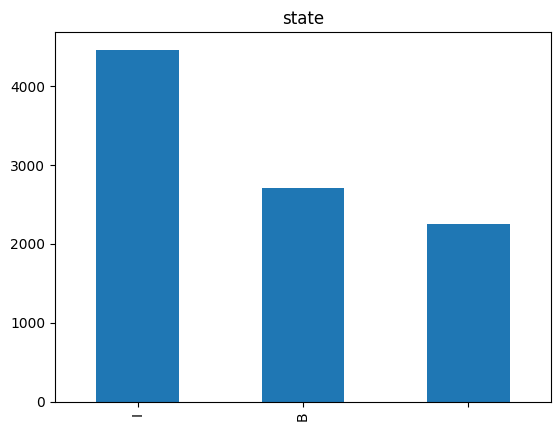

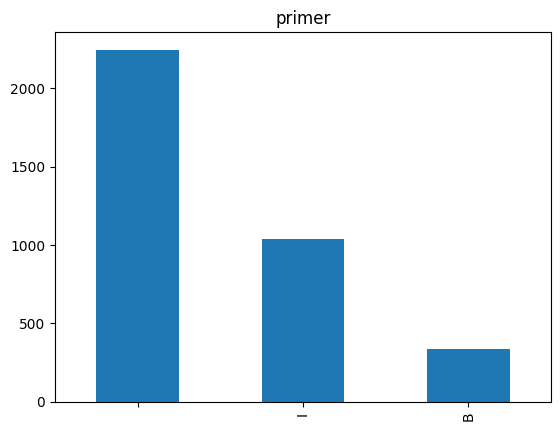

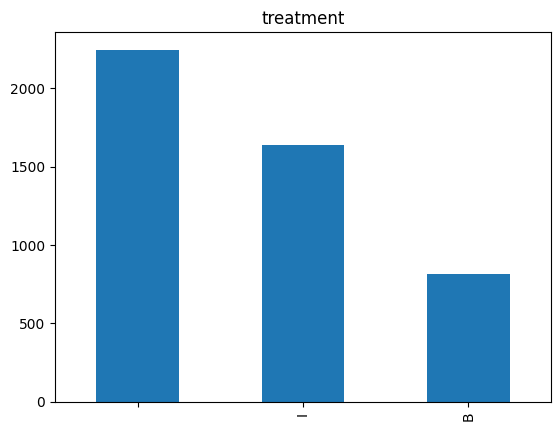

In [10]:
import matplotlib.pyplot as plt
df = data_frame.drop('token', axis=1)

# Assuming you already have a DataFrame named 'df'

# Define the label to remove
label_to_remove = 'O'

# Iterate over each column in the DataFrame
for column in df.columns:
    # Get the unique values and their frequencies
    unique_values = df[column].value_counts()

    # Remove the label from unique values if it exists
    if label_to_remove in unique_values:
        unique_values = unique_values.drop(label_to_remove)

    # Plot a bar chart or histogram
    if len(unique_values) <= 10:
        # If there are fewer than or equal to 10 unique values, plot a bar chart
        unique_values.plot(kind='bar', title=column)
    else:
        # If there are more than 10 unique values, plot a histogram
        df[column].plot(kind='hist', title=column)

    # Show the plot
    plt.show()

In [11]:
data_frame.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Metagenomics/complete_dataset.csv')

In [12]:
# # # Function to transform values
# # def transform_value(col_name, value):
# #     if value == 'B':
# #         return 'B-' + col_name
# #     elif value == 'I':
# #         return 'I-' + col_name
# #     return 'O'

# # def merge_columns(df, df_tokens):
# #     for col_name in df.columns:
# #         df[col_name] = df[col_name].apply(lambda x: transform_value(col_name, x))

# #     # Create new DataFrame with columns 'token' and 'ner'
# #     new_df = pd.DataFrame()
# #     new_df['token'] = df_tokens['token']
# #     new_df['ner'] = df.iloc[:, 0:].apply(lambda row: 'O' if all(x == 'O' for x in row) else next((x for x in row if x != 'O'), 'O'), axis=1)

# #     return new_df

# # import pandas as pd

# def transform_dataframe(df):
#     ner_df = pd.DataFrame(columns=['token', 'ner'])  # New DataFrame to store transformed data

#     # Iterate over each row in the input DataFrame
#     for i, row in df.iterrows():
#         token = row['token']
#         ner = ''

#         # Iterate over each column starting from the second column
#         for col in df.columns[1:]:
#             value = row[col]

#             if value == 'B':
#                 ner = col  # Set the NER value to the current column name
#                 break
#             elif value == 'I':
#                 ner = col  # Set the NER value to the current column name

#                 # Check if the previous column has 'B' or 'I' value
#                 prev_col = df.columns[list(df.columns).index(col) - 1]
#                 prev_value = row[prev_col]
#                 if prev_value == 'B' or prev_value == 'I':
#                     df.at[i, prev_col] = 'O'  # Set the previous column to 'O'

#                 # Set the following rows in the current column to 'O' until 'O' is encountered
#                 for j in range(i + 1, len(df)):
#                     if df.at[j, col] == 'O':
#                         break
#                     df.at[j, col] = 'O'

#                 break
#         ner_df = pd.concat([ner_df, pd.DataFrame.from_records([{ 'token': token, 'ner': ner  }])])

#     return ner_df

# # Example usage:
# # Assuming your original DataFrame is named 'df'
# # new_df = transform_dataframe(df)



# def transform_dataframe(df):
#     ner_df = pd.DataFrame(columns=['token', 'ner'])  # New DataFrame to store transformed data
#     cols = df.columns[1:]  # Exclude the first column ('token')
#     df_copy = df.copy()  # Create a copy of the DataFrame

#     # Iterate over each row in the input DataFrame
#     for i, row in df.iterrows():
#         token = row['token']
#         ner = ''

#         # Iterate over each column starting from the second column
#         for col in cols:
#             value = row[col]

#             if value == 'B':
#                 ner = 'B-' + col  # Set the NER value to 'B-column_name'
#                 break
#             elif value == 'I':
#                 ner = 'I-' + col  # Set the NER value to 'I-column_name'
#                 break

#         ner_df = pd.concat([ner_df, pd.DataFrame.from_records([{ 'token': token, 'ner': ner  }])])

#     return ner_df


# def transform_dataframe(df):
#     ner_df = pd.DataFrame(columns=['token', 'ner'])  # New DataFrame to store transformed data

#     # Define a lambda function to transform each row
#     transform_row = lambda row: {'token': row['token'], 'ner': get_ner(row)}

#     # Apply the lambda function to each row of the DataFrame and store the results in a list
#     ner_data = df.apply(transform_row, axis=1).tolist()

#     # Convert the list of dictionaries into a DataFrame
#     ner_df = pd.DataFrame.from_records(ner_data)

#     return ner_df

# def get_ner(row):
#     token = row['token']
#     if token != '':
#       for col in row.index[1:]:
#           value = row[col]
#           if value == 'B':
#               return 'B-' + col
#           elif value == 'I':
#               return 'I-' + col
#           else:
#               return 'O'
#     return ''

def transform_dataframe(df):
    ner_df = pd.DataFrame(columns=['token', 'ner'])  # New DataFrame to store transformed data

    # Define a lambda function to transform each row
    transform_row = lambda row: {'token': row['token'], 'ner': get_ner(row)}

    # Apply the lambda function to each row of the DataFrame and store the results in a list
    ner_data = df.apply(transform_row, axis=1).tolist()

    # Convert the list of dictionaries into a DataFrame
    ner_df = pd.DataFrame.from_records(ner_data)

    return ner_df

def get_ner(row):
    token = row['token']
    if token != '':
        found_ner = False
        for col in row.index[1:]:
            value = row[col]
            if value == 'B':
                return 'B-' + col
            elif value == 'I':
                return 'I-' + col
            elif value != 'O':
                found_ner = True

        if not found_ner:
            return 'O'

    return ''

In [13]:
set1 = transform_dataframe(data_frame[['token','body-site', 'ecoregion', 'engineered', 'sequencing']])
# set2 = transform_dataframe(data_frame[['token','treatment', 'site' ]])
# set3 = transform_dataframe(data_frame[['token','LCM',  'date', 'place', 'host']])
# set4 = transform_dataframe(data_frame[['token','sample-material', 'LS', 'gene']])
# set5 = transform_dataframe(data_frame[['token','kit', 'state',  'primer']])

In [14]:
set1.head(60)

,token,ner
0,Methods,O
1,Sediment,O
2,core,O
3,sample,O
4,In,O
5,2012,O
6,",",O
7,the,O
8,IODP,O
9,Expedition,O


In [15]:
set1.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Metagenomics/set1_dataset.csv')

In [16]:
set1['ner'].unique()

array(['O', 'B-ecoregion', '', 'B-body-site', 'B-engineered',
       'I-engineered', 'B-sequencing', 'I-sequencing', 'I-body-site',
       'I-ecoregion'], dtype=object)

In [17]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.7 MB/s eta 0:00:00


In [18]:
label_list_ = set1['ner'].dropna().unique().tolist()
label_list = [x for x in label_list_ if x]
label_list

['O',
 'B-ecoregion',
 'B-body-site',
 'B-engineered',
 'I-engineered',
 'B-sequencing',
 'I-sequencing',
 'I-body-site',
 'I-ecoregion']

In [19]:
id2label = {idx: tag for idx, tag in enumerate(label_list)}
label2id = {tag: idx for idx, tag in enumerate(label_list)}

id2label

{0: 'O',
 1: 'B-ecoregion',
 2: 'B-body-site',
 3: 'B-engineered',
 4: 'I-engineered',
 5: 'B-sequencing',
 6: 'I-sequencing',
 7: 'I-body-site',
 8: 'I-ecoregion'}

In [20]:
def convert_IOB_transformer(test_list, pattern):

  new_list = []
  sub_list = []
  for i in test_list:

    if i!=pattern:
      sub_list.append(i)
    else:
      new_list.append(sub_list)
      sub_list = []



  return new_list

In [21]:
def get_token_ner_tags(df_, split_name, label2id_):

  ner_tag_list_ =  df_['ner'].map(label2id_).fillna('#*#*#*#*#*#*#*#*').tolist() #convert the list to a pandas series temporarily before mapping
  token_list_ = df_['token'].tolist()

  token_list = convert_IOB_transformer(test_list=token_list_, pattern='')
  ner_tag_list = convert_IOB_transformer(test_list=ner_tag_list_, pattern='#*#*#*#*#*#*#*#*')


  df = pd.DataFrame(list(zip(token_list, ner_tag_list)),
                columns =['token', 'ner'])

  # df.to_csv(path_+'GP-DS-OG-CD-Santosh/'+split_name+'_formatted.tsv', index=None, sep ='\t', header=None)

  return token_list, ner_tag_list, df

In [22]:
train_tokens, train_tags, train_df = get_token_ner_tags(df_=set1, split_name='train',label2id_= label2id)

In [23]:
len(train_tokens), len(train_tags)

(2246, 2246)

In [24]:
train_df

,token,ner
0,"[Methods, Sediment, core, sample, In, 2012, ,,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[From, the, BaCh1, chimney, ,, the, following,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[Intestinal, Microbiota, Analyses, The, data, ...","[2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[The, same, reactor, was, used, in, three, dif...","[0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[Caribbean, AGMs, (, Chlorocebus, sabaeus, ,, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...
2241,"[Metagenomic, libraries, were, prepared, using...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2242,"[Patients, in, the, cohort, were, included, in...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2243,"[The, cattle, manure, sampled, in, April, was,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2244,"[For, dissolved, inorganic, carbon, (, DIC, ),...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [25]:
from datasets import Dataset, DatasetDict, Features, Sequence, Value, ClassLabel, load_metric

In [26]:
ds = Dataset.from_pandas(train_df)

In [27]:
ds

Dataset({
    features: ['token', 'ner'],
    num_rows: 2246
})

In [28]:
ds = ds.train_test_split(test_size=0.2)

In [29]:
ds

DatasetDict({
    train: Dataset({
        features: ['token', 'ner'],
        num_rows: 1796
    })
    test: Dataset({
        features: ['token', 'ner'],
        num_rows: 450
    })
})

In [58]:
# Train

In [30]:
!pip install huggingface_hub
!python -c "from huggingface_hub.hf_api import HfFolder; HfFolder.save_token('YOUR_TOKEN_HERE')"

In [31]:
from huggingface_hub import notebook_login
notebook_login()

In [32]:
!pip install transformers seqeval #[gpu]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16165 sha256=e15b8f899792e7d544f4d2d15a973a1aaafbe2a9174c39d2d92a38aa3252b8d7
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [33]:
task = "ner" # Should be one of "ner", "pos" or "chunk"
model_checkpoint = "bioformers/bioformer-8L" # "bioformers/bioformer-8L" #  #'microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext' #"nlpie/bio-tinybert"
batch_size = 16

In [34]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [35]:
import transformers
assert isinstance(tokenizer, transformers.PreTrainedTokenizerFast)

In [36]:
label_all_tokens = True

In [37]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(examples["token"], max_length=512, truncation=True, is_split_into_words=True)
    labels = []
    for i, label in enumerate(examples[f"{task}"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            # Special tokens have a word id that is None. We set the label to -100 so they are automatically
            # ignored in the loss function.
            if word_idx is None:
                label_ids.append(-100)
            # We set the label for the first token of each word.
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])
            # For the other tokens in a word, we set the label to either the current label or -100, depending on
            # the label_all_tokens flag.
            else:
                label_ids.append(label[word_idx] if label_all_tokens else -100)
            previous_word_idx = word_idx

        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [38]:
tokenized_datasets = ds.map(tokenize_and_align_labels, batched=True)

Map:   0%|          | 0/1796 [00:00<?, ? examples/s]

Map:   0%|          | 0/450 [00:00<?, ? examples/s]

In [39]:
from transformers import AutoModelForTokenClassification, TrainingArguments, Trainer

model = AutoModelForTokenClassification.from_pretrained(model_checkpoint, num_labels=len(label_list),id2label=id2label,label2id=label2id)

Some weights of the model checkpoint at bioformers/bioformer-8L were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized fr

In [48]:
model_name = 'metagenomics_'+model_checkpoint.split("/")[-1]
args = TrainingArguments(
    f"{model_name}-finetuned-{task}",
    evaluation_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=50,
    weight_decay=0.01,
    # push_to_hub=True,
    # save_strategy="epoch",
)



In [41]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer)

In [42]:
metric = load_metric("seqeval")

<ipython-input-42-e20ba34f8cc7>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("seqeval")


In [43]:
label_list

['O',
 'B-ecoregion',
 'B-body-site',
 'B-engineered',
 'I-engineered',
 'B-sequencing',
 'I-sequencing',
 'I-body-site',
 'I-ecoregion']

In [44]:
import numpy as np

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    # Remove ignored index (special tokens)
    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }

In [49]:
trainer = Trainer(
    model,
    args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [50]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.069125,0.464286,0.477690,0.470893,0.977329
2,No log,0.061663,0.515385,0.527559,0.521401,0.981616
3,No log,0.060217,0.529976,0.580052,0.553885,0.982378
4,No log,0.056002,0.509554,0.629921,0.563380,0.981806
5,0.047300,0.066285,0.595300,0.598425,0.596859,0.983283
6,0.047300,0.070534,0.515888,0.724409,0.602620,0.980711
7,0.047300,0.066345,0.626598,0.643045,0.634715,0.984616
8,0.047300,0.063584,0.610849,0.679790,0.643478,0.984950
9,0.014500,0.066012,0.578723,0.713911,0.639248,0.983997
10,0.014500,0.073236,0.568421,0.708661,0.630841,0.983568


TrainOutput(global_step=5650, training_loss=0.0068342391368562145, metrics={'train_runtime': 402.7518, 'train_samples_per_second': 222.966, 'train_steps_per_second': 14.028, 'total_flos': 1918748064000600.0, 'train_loss': 0.0068342391368562145, 'epoch': 50.0})